In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys

In [4]:
import matplotlib.pyplot as plt

In [5]:
sys.path.append("/mnt/d/Rutgers/control_transition/")

In [6]:
from plot_utils import *

In [7]:
from data_collapse import *

In [207]:
nshell=2
L=11
mu=1.1
# zz=load_torch_pt(f'class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es50_seed0_SE.pt')
zz=load_torch_pt(f'class_A_2D_L11_nshell2_mu1.20_es50_seed0_SE.pt')

# Generate

In [116]:
L_list=range(11,21,2)
params_list=[
({'es':'50',},{'L':L_list,'nshell':[2,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2)) }),
({'es':'50',},{'L':L_list,'nshell':[3,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.3,1.8,11)]),2)) }),
({'es':'50',},{'L':L_list,'nshell':[4,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.6,2.1,11)]),2)) }),
({'es':'50',},{'L':L_list,'nshell':[5,],'mu': np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.6,2.1,11)]),2)) }),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='{L} {mu:.2f} {nshell}',
        load_data=load_torch_pt,
        filename="params.txt",
        filelist=None,
        load=False,
        data_dict=None,
        data_dict_file=None, 
    )



generate_params: 100%|██████████| 80/80 [00:00<00:00, 22916.56it/s]


generate_params: 100%|██████████| 80/80 [00:00<00:00, 15967.66it/s]


# Load

In [41]:
np.unique(np.round(np.hstack([np.linspace(1.1,2.1,11),np.linspace(1.1,1.6,11)]),2))

array([1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.7 , 1.8 , 1.9 , 2.  , 2.1 ])

In [46]:
np.linspace(1.1,2.1,21)

array([1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ])

In [211]:
L_list=range(11,21,2)
params_list=[
({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.linspace(1.1,2.1,21)}),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
data_0_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_0_dict,
        data_dict_file=None, 
    )


df_0=convert_pd(data_0_dict,names=['Metrics','L','nshell','mu','seed0'])

generate_params: 100%|██████████| 420/420 [00:02<00:00, 199.74it/s]


# Data

## nshell 2

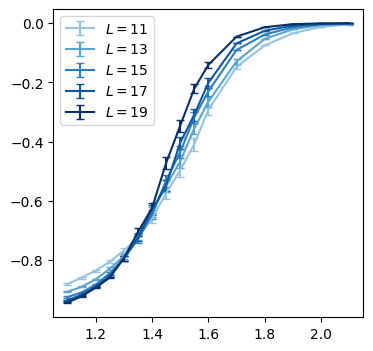

In [212]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
# ax.set_xlim([1.1,1.6])
# ax.set_ylim([-1,-0.2])


In [213]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':2},Lmin=11,Lmax=19,p_range=[1.1,1.6],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.39,p_c_range = dc.p_range,nu_range=(0.5,3))


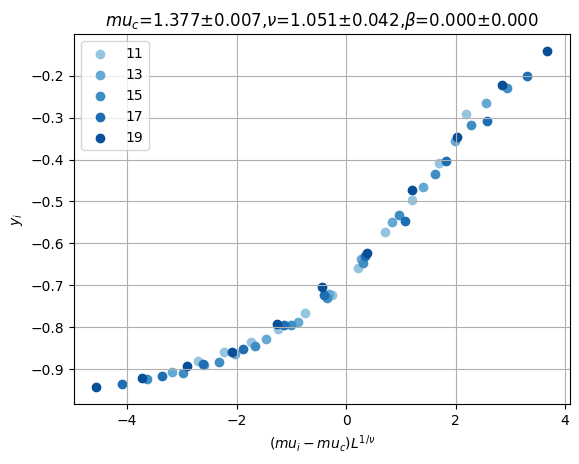

In [214]:
dc.plot_data_collapse()

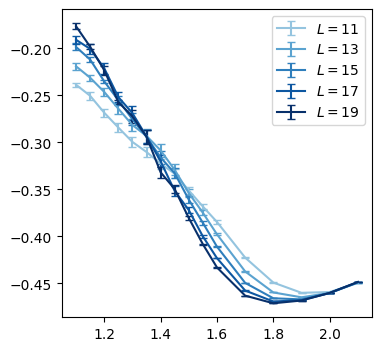

In [215]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


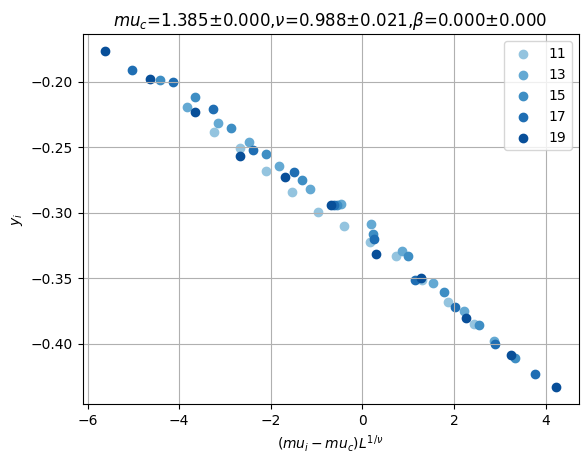

In [216]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':2},Lmin=11,Lmax=19,p_range=[1.1,1.6],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.39,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

## nshell 3

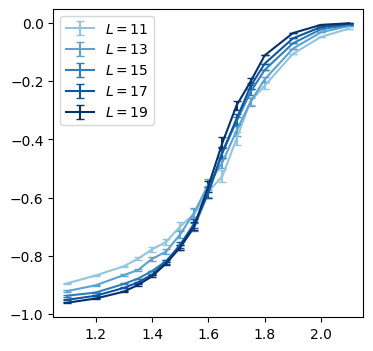

In [217]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=3
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


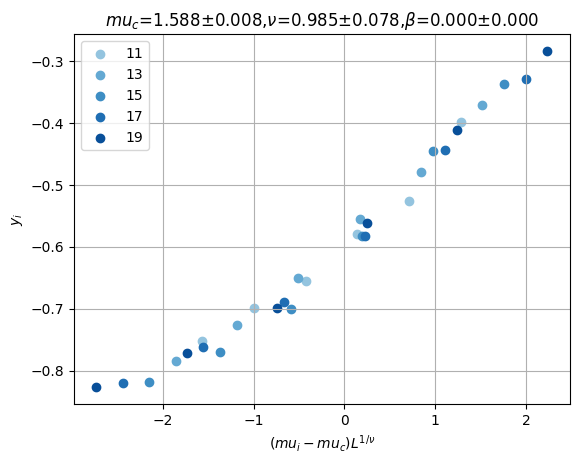

In [223]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':3},Lmin=11,Lmax=19,p_range=[1.45,1.7],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.59,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

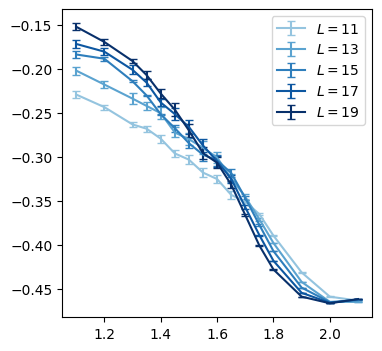

In [224]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=3
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


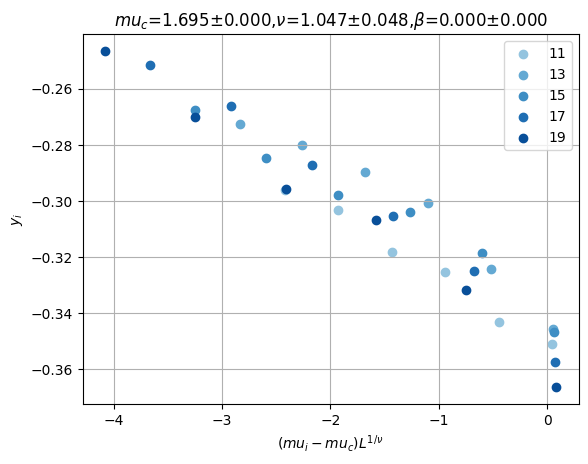

In [225]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':3},Lmin=11,Lmax=19,p_range=[1.45,1.7],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.69,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

In [228]:
dc.res

## nshell = 4

In [254]:
data

mu
1.2    [-0.9488828624803951, -0.948882863940821, -0.9...
1.6    [-0.8234261596384214, -0.8234275657219086, -0....
1.8    [-0.3590902967521925, -0.6594554301465244, -0....
2.0    [-0.07146570463422022, -0.07146570463422022, -...
Name: observations, dtype: object

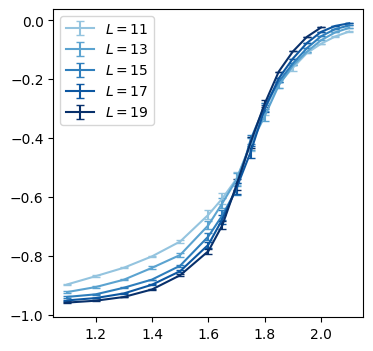

In [255]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=4
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()

# ax.set_xlim([1.6,2.1])
# ax.set_ylim([-0.8,0])

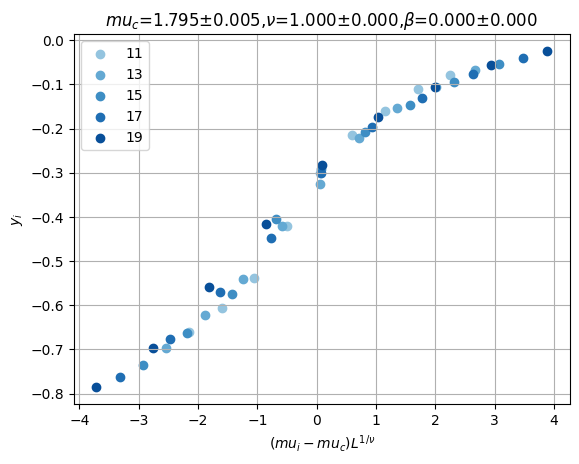

In [244]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.76,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=False)
dc.plot_data_collapse()

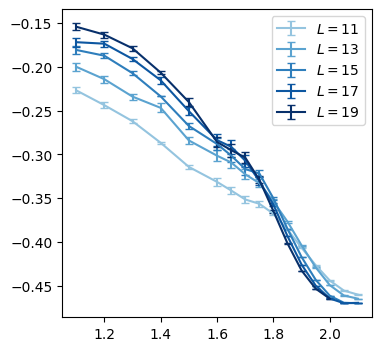

In [245]:
fig,ax=plt.subplots(figsize=(4,4))
nshell=4
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_0['observations'].xs('TMI',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


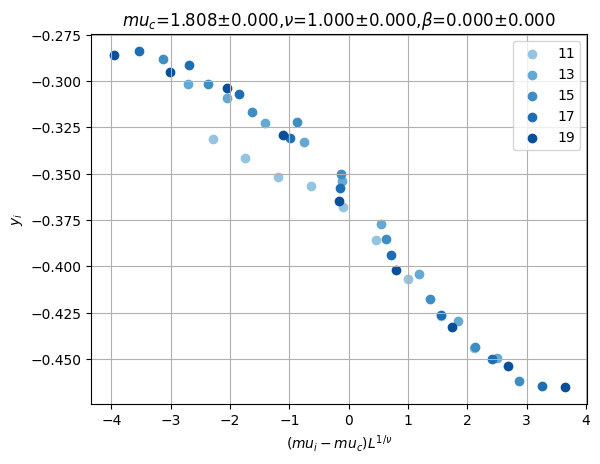

In [249]:
dc=DataCollapse(df=df_0,params={'Metrics':'TMI','seed0':0,'nshell':4},Lmin=11,Lmax=19,p_range=[1.6,2],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3),nu_vary=False)
dc.plot_data_collapse()

In [250]:
dc.res

## nshell =5

In [127]:
(12+154+180)/60

5.766666666666667

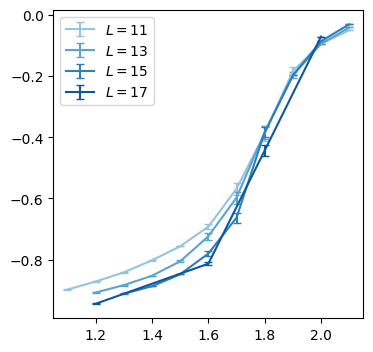

In [251]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=5
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list[:-1]:
    data=(df_0['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()


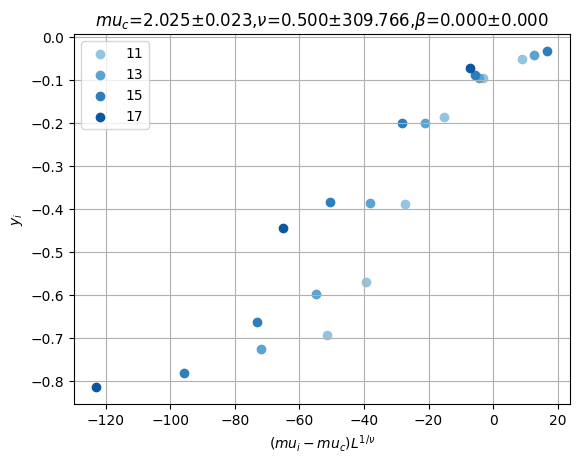

In [114]:
dc=DataCollapse(df=df_0,params={'Metrics':'Chern','seed0':0,'nshell':5},Lmin=11,Lmax=17,p_range=[1.6,2.1],p_='mu',L_='L')
dc.datacollapse(nu=1.,p_c=1.79,p_c_range = dc.p_range,nu_range=(0.5,3))
dc.plot_data_collapse()

In [ ]:
You can check what happened for "19 1.30 2", and seed = 4

[hp636@amarel2 GTN]$ cat 25.err
100%|██████████| 19/19 [03:48<00:00, 12.04s/it]
100%|██████████| 19/19 [03:49<00:00, 12.06s/it]
100%|██████████| 19/19 [03:49<00:00, 12.10s/it]
100%|██████████| 19/19 [03:49<00:00, 12.07s/it]

In [204]:
np.round(np.unique(np.hstack([np.linspace(0,0.1,21)[1:], np.linspace(0,1,11)[2:]])),3)

array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.2  , 0.3  , 0.4  , 0.5  , 0.6  , 0.7  , 0.8  ,
       0.9  , 1.   ])

In [205]:
L_list=range(11,19,2)
params_list=[
({'es':'50','nshell':2,'mu':1},{'L':L_list,'sigma':np.round(np.unique(np.hstack([np.linspace(0,0.1,21)[1:], np.linspace(0,1,11)[2:]])),3)}),
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round( np.hstack([np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4)]) ,2)}),
# np.hstack(np.linspace(1.1,2.1,11),np.linspace(2.2,2.8,4))
# ({'es':'50',},{'L':L_list,'nshell':[2,3,4,5],'mu':np.round(np.linspace(-0.5,0.5,11),2)}),
]
data_1_dict={'fn':set(),}
for fixed_params,vary_params in params_list:
    data_1_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='class_A_2D_L{L}_nshell{nshell}_mu{mu:.2f}_sigma{sigma:.3f}_es{es}_seed0_SE.pt',
        fn_dir_template='.',
        input_params_template='',
        load_data=load_torch_pt,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_1_dict,
        data_dict_file=None, 
    )


df_1=convert_pd(data_1_dict,names=['Metrics','L','nshell','mu','sigma','seed0'])

generate_params:   0%|          | 0/116 [00:00<?, ?it/s]/mnt/d/Rutgers/control_transition/plot_utils.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_dict[params]=torch.tensor(observations).numpy()
generate_params: 100%|██████████| 116/116 [00:00<00:00, 183.47it/s]


In [199]:
df_1

,,,,,,observations
Metrics,L,nshell,mu,sigma,seed0,
Chern,11,2,1.0,0.005,0,"[-0.9118747633152933, -0.9148937674345442, -0...."
TMI,11,2,1.0,0.005,0,"[-0.21860687358246542, -0.21481171577754926, -..."
Chern,11,2,1.0,0.010,0,"[-0.9119230370081961, -0.9146619434642215, -0...."
TMI,11,2,1.0,0.010,0,"[-0.21941145259140113, -0.21532752195668234, -..."
Chern,11,2,1.0,0.015,0,"[-0.9118899365835148, -0.9147240764040961, -0...."
...,...,...,...,...,...,...
TMI,17,2,1.0,0.090,0,"[-0.23646378963981898, -0.20387245601284473, -..."
Chern,17,2,1.0,0.095,0,"[-0.9661335812760348, -0.8735604964071936, -0...."
TMI,17,2,1.0,0.095,0,"[-0.26927584457770226, -0.23652416551522018, -..."


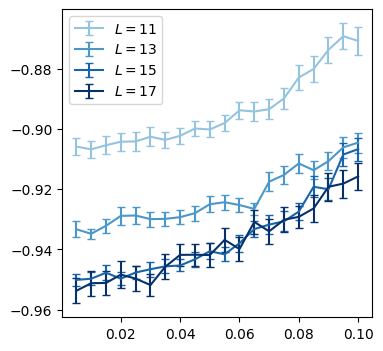

In [200]:
fig,ax=plt.subplots(figsize=(4,4))
L=11
nshell=2
color_list = iter(plt.cm.Blues(np.linspace(0.4,1,len(L_list))))
for L in L_list:
    data=(df_1['observations'].xs('Chern',level='Metrics').xs(nshell,level='nshell').xs(L,level='L').xs(0,level='seed0').xs(1,level='mu'))
    mu_list_1 = data.index
    data_mean = data.apply(np.mean)
    data_sem = data.apply(lambda x: np.std(x)/np.sqrt(len(x)))
    ax.errorbar(mu_list_1,data_mean,yerr=data_sem,label=f'$L={L}$',capsize=3,color=next(color_list))
ax.legend()
# ax.set_xlim([1.1,1.6])
# ax.set_ylim([-1,-0.2])


In [197]:
np.linspace(0,1,11)[2:]

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])